In [3]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_csv("UniversalBank.csv")
dataset.head()

In [ ]:
#We don't need id column.
dataset=dataset.drop(["ID"],axis=1)
dataset.head()

In [ ]:
dataset.shape

In [ ]:
pd.isnull(dataset).sum()

In [13]:
#mapping function to map different string objects to integer, if you have an string column the output will be an integers
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

dataset=mapping(dataset,feature="Age")

#not useful in this dataset

In [ ]:
dataset = dataset.astype(np.int32)
dataset['CCAvg'] = dataset['CCAvg'].astype(np.float32)

dataset.info()

In [34]:
def mapping_clas(dataset):
    # Créer une nouvelle colonne "Age_Category" en fonction de l'âge
    dataset['Age_Category'] = pd.cut(dataset['Age'], bins=[0, 18, 30, 50, np.inf], labels=['Enfant', 'Jeune', 'Adulte', 'Senior'])
    return dataset

# Utilisation de la fonction de mapping pour créer une nouvelle fonctionnalité
mapping_clas(dataset)
#useless for now
dataset =dataset.drop(["Age_Category"],axis=1)



In [ ]:
dataset.sample(5)

In [ ]:
dataset.info()

In [37]:
X=dataset.drop(["Personal Loan"],axis=1)
y=dataset["Personal Loan"]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.1, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [38]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [49]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

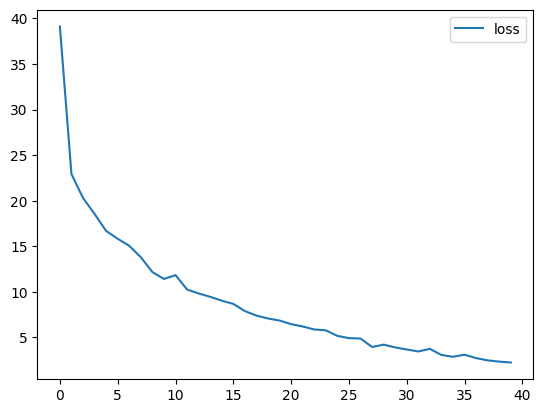

29/29 [==============================] - 0s 3ms/step - loss: 2.7276 - accuracy: 0.9067
Loss: 2.7275900840759277
Accuracy 90.66666960716248


In [59]:
firstModel=getModel([12,50,1])
#divide into 3 layer, first hidden layer with 12 neuron, second layer 50 neurons and the last one is the output layer with one

firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])
#we got a graph that show to us the loss of our models
scores=firstModel.evaluate(np.array(valX),np.array(valY))
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)


In [ ]:
SecondModel=getModel([12,50,70,40,1])
SecondModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

scores=SecondModel.evaluate(np.array(valX),np.array(valY))
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)


In [ ]:
ThirdModel=getModel([12,500,500,500,1])
ThirdModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

scores=ThirdModel.evaluate(np.array(valX),np.array(valY))
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

In [57]:
predY=firstModel.predict(np.array(testX))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

16/16 [==============================] - 0s 3ms/step


In [58]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
m=pd.crosstab(predY,testY)
print("Confusion matrix")
print(m)


Confusion matrix
Personal Loan    0   1
row_0                 
0              446  52
1                0   2
